<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/HW0519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter05. 회귀

##01. 회귀소개

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭함

머신러닝 회귀예측 : 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이 핵심

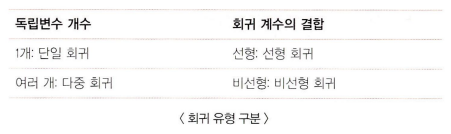

지도학습 : 분류 - 예측값이 이산형 클래스 값 / 회귀 - 예측값이 연속형 숫자 값

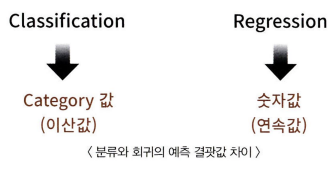

선형 회귀: 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최소하는 방식

규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것

[회귀 모델 종류]
* 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
* 릿지 : 릿지 회귀는 선형회귀에 L2 규제를 추가한 회귀 모델. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
* 라쏘 : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식. L1 규제는 예측 영향력이 작은 피처의 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 하는 것. L1 규제는 피처 선택 기능으로도 불림
* 엘라스틱넷 : L2,L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함
* 로지스틱 회귀 : 로지스틱 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형 모델임. 로지스틱 회귀는 매우 강력한 분류 알고리즘임. 일반적으로 이진 분류뿐만 아니라 최소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임

##02. 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형 회귀

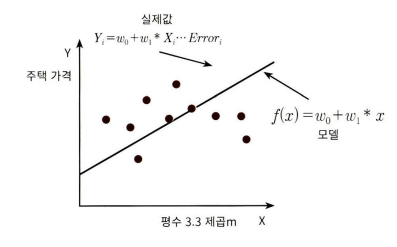

잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값

최적의 회귀 모델 : 전체 데이터의 잔차 합이 최소가 되는 모델

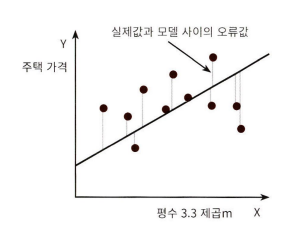

mean absolute error : 오류 값에 절댓값을 취해 더하는 방식

RSS : 오류 값은 +나 -가 될 수 있기 떄문에, 오류 합을 계산할 때, 오류 값을 제곱을 구해서 더하는 방식

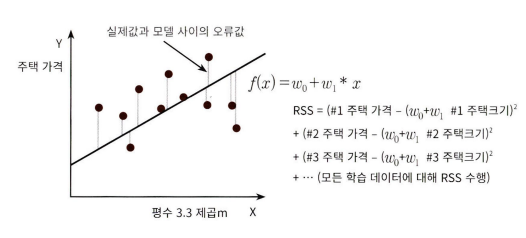

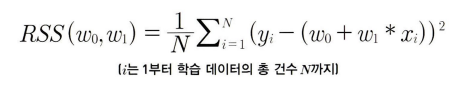

회귀에서 RSS는 비용이며, w변수 (회귀계수)로 구성되는 RSS를 비용 함수라고 함. 

머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값 (오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것

비용 함수 : 손실 함수 : loss function

##03. 비용 최소화하기 - 경사하강법 소개

경사하강법 : 고차원 방정식에 대한 문제를 해결해주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식 / 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

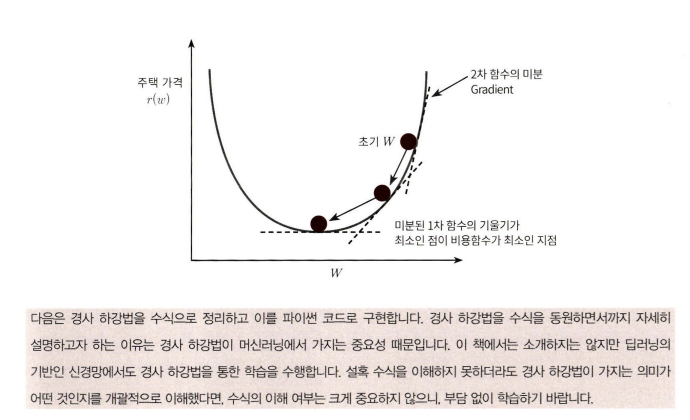

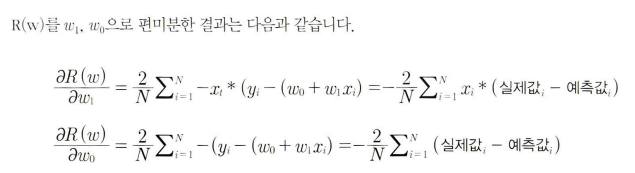

w1, w0의 편미분 결과값을 반복적으로 보정하면서 w1,w0 값을 업데이트하면 비용 함수가 최소가 되는 w1, w0 값을 구할 수 있음

경사하강법의 프로세스

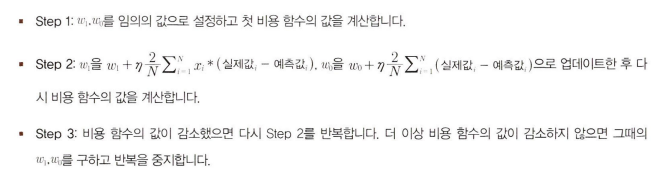

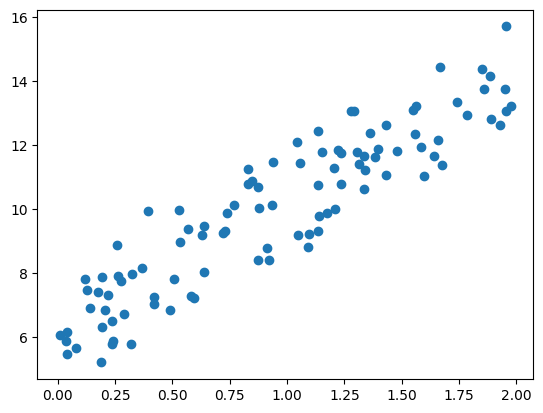

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4X+6을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X=2 * np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [4]:
#비용함수 정의
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [5]:
#w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0, X,y, learning_rate=0.01):
  N=len(y)
  #먼저 w1_update, w2_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T)+w0
  diff = y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  #w1과 w0를 업데이트 할 w1_update, w2_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [6]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y, iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [7]:
#RSS 차이를 계산하는 함수 생성 및 경사 하강법의 예측 오류 계산
def get_cost(y, y_pred):
  N= len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


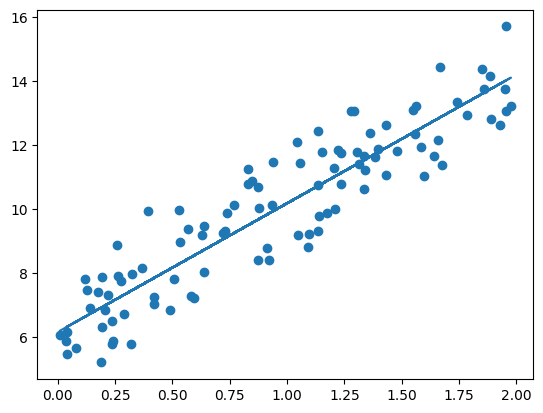

In [8]:
#y_pred에 기반해 회귀선 그리기
plt.scatter(X,y)
plt.plot(X,y_pred)

경사 하강법을 이용해 회귀선이 잘 만들어짐

경사 하강법은 수행 시간이 매우 오래 걸림 -> 확률적 경사 하강법 이용

확률적 경사 하강법 : 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산함

In [9]:
#미니 배치 확률적 경사 하강법 함수 구현
def stochastic_gradient_descent_steps(X,y, batch_size=10, iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [10]:
#w1,w0 및 예측 오류 비용 계산
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1:",round(w1[0,0],3), "w0",round(w0[0,0],3))
y_pred = w1[0,0] * X +w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0 6.156
Stochastic Gradient Descent Total Cost:0.9937


확률적 경사 하강법으로 구한 w0,w1 결과는 경사 하강법과 큰 차이가 없으며, 예측 오류 비용 또한 경사 하강법으로 구한 것보다 아주 조금 높을 뿐으로 예측상의 큰 차이가 없음

[피처가 여러 개인 경우]
피처가 M개 있다면, 회귀 계수는 M+1개

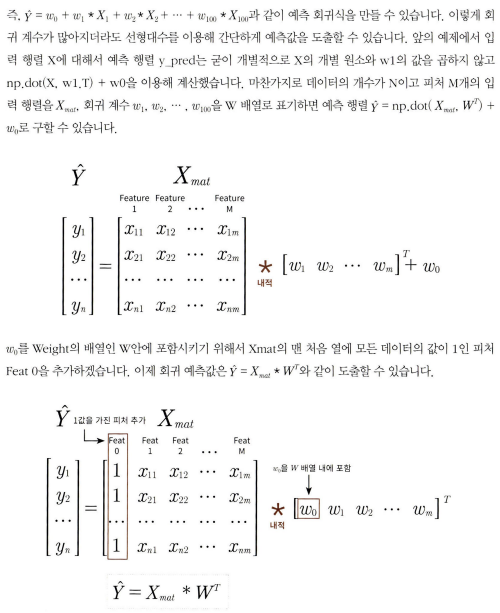

## 다항 회귀와 과(대)적합/과소적합 이해

###다항 회귀 이해

다항 회귀 : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

다항 회귀는 비선형 회귀가 아닌 선형 회귀임

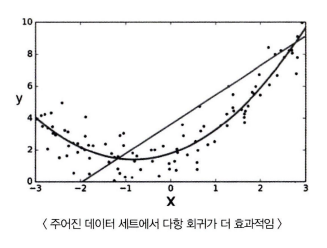

In [11]:
#polynomialfeatures를 이용해 단항값을 다항값으로 변환하는 예제
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 mtx 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식의 계수 피처:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 polynomialfeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식의 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [12]:
#3차 다항 계수를 이용해 3차 다항 회귀 함수식 유도
def polynomial_func(X):
  y = 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [16]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('삼차 다항식 계수 feature :\n',poly_ftr)

#Linear Regression에 3차 다항식 계수 피처와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)

print('Polynomial 회귀 계수:\n',np.round(model.coef_,2))
print('Polynomial 회귀 shape:',np.round(model.coef_.shape))

삼차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: [10]


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

#Pipeline 객체로 streamline하게 Polynomial 피처 변환과 linear regression 을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y =  polynomial_func(X)
model = model.fit(X,y)

print('Polynomial 회귀 계수:\n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


###다항 회귀를 이용한 과소적합 및 과적합 이해

과적합 : 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터임
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y는 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더함
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


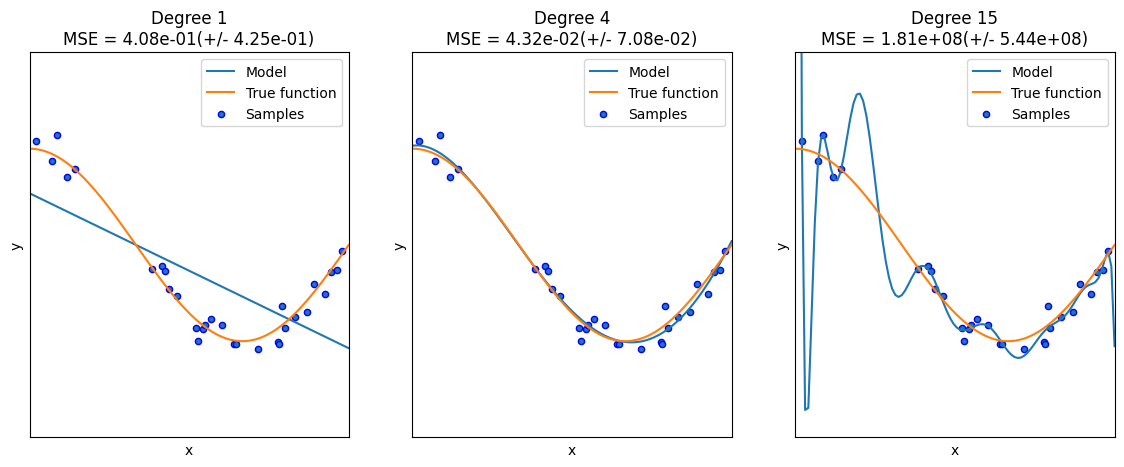

In [19]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

#다항회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree별로 polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
     ("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)

    #교차검증으로 다항회귀 평가
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    #pipeline을 구성하는 세부 객체를 접근하는 named_steps를 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))

    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려 비교    
    X_test = np.linspace(0, 1, 100)

    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

    #실제값 곡선
    plt.plot(X_test, true_fun(X_test), '-',label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y")
    plt.xlim((0, 1)); plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

점선 : 실제 데이터 세트 X,Y의 코사인 곡선

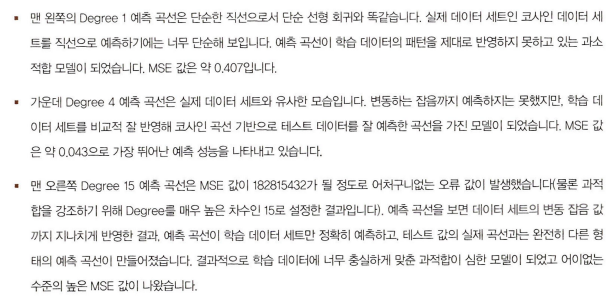

좋은 모델 : 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델

### 편향-분산 트레이드 오프

고편향성을 가진 모델 : 매우 단순화된 모델로 지나치게 한 방향성으로 치우친 경향이 있는 모델

고분산성을 가진 모델 : 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지는 모델

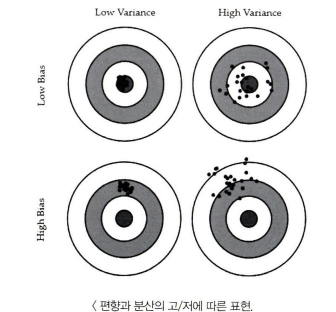

1. 저편향/저분산 : 예측 결과가 실제 결과에 매두 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 아주 뛰어난 성능
2. 저편향/고분산 : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포됨
3. 고편향/저분산 : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중됨
4. 고편향/고분산 : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포됨

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음

-> 편향이 높으면 분산이 낮아지고 (과소적합), 분산이 높으면 편향이 낮아짐(과적합)

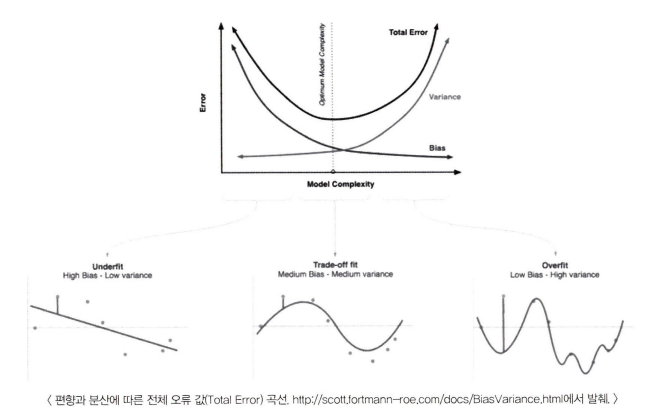

편향이 너무 높으면 전체 오류가 높다. 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아진다. 평향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 오히려 증가하면서 예측 성능이 다시 저하됨.

높은 편향 / 낮은 분산에서 과소적합되기 쉬우며 높은 편향/높은 분산에서 과적합되기 쉽다. 편향과 분산이 서로 트레이드오프를 이루면서 오류 cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법임